In [1]:
import numpy as np
import pandas as pd
import random
from  scipy.stats import bernoulli
import matplotlib.pyplot as plt

# Implementing a simple GA algorithm for the Travelling Salesman Problem

In [3]:
def sampleSolution(cities):
    """
      Samples randomly a route, represented as a permutation of the cities
    """
    route = random.sample(cities, len(cities))
    return route

In [4]:
def map_index_to_city(cities):
    """
      From a list of cities, returns a dictionary with 
      key = length of the city in the dictionary
      value = coordinates of the city
    """
    dictionary_cities = {}
    for _ in range(len(cities)):
      dictionary_cities[_+1] = cities[_]
    return dictionary_cities

In [5]:
def get_route_from_representation(repList, dictionaryCities):

   """
    From a list of representations of the city, returns the list of coordinates 
   """
   
   route = []
   for rep in repList:
     route.append(dictionaryCities[rep])
   return route

In [6]:
def distance(city1, city2):

    """
      Computes the distance between the cities 
    """

    x_1 = city1[0]
    y_1 = city1[1]
    x_2 = city2[0]
    y_2 = city2[1]
    distance = np.sqrt((x_1-x_2)**2+(y_1-y_2)**2)
    #print(distance)
    return distance

In [7]:
def fitness(route):
  """
    Computes the fitness of a candidate (route) as the inverse of the 
    total distance travelled
  """

  # first, we compute the distance among the cities in the route
  distance_route = 0
  for _ in range(len(route)-1):
    distance_route += distance(route[_], route[_+1])
  #print('Total distance travelled is: ', distance_route)
  # the fitness is defined as the inverse of the distance
  fitness = 1/distance_route
  return fitness

In [8]:
def computeFitnessForGeneration(generation, N_Pool, dicCities):
  """
    Applies the fitness function to every route in the generation
  """
  fit_values = []
  distance_values = []
  for i in range(N_Pool):
    candidate = generation[i]
    route = get_route_from_representation(candidate, dicCities)
    fit_route = fitness(route)
    fit_values.append(fit_route)
    distance_values.append(1/fit_route)
  return distance_values, fit_values

In [9]:
def selectFittest(pool, fitnessPool):
    """
      Implements tournament selection with K = 2
    """
    #print("Size of the pool is ", len(pool))
    parents = []
    for _ in range(len(pool)):
      id1 = random.randint(0,N_Pool -1)
      #print(id1)
      id2 = random.randint(0,N_Pool -1)
      #print(id2)
      if fitnessPool[id1]> fitnessPool[id2]:
        best = id1
      else:
        best = id2
      parents.append(pool[best])
    return parents
      
             
    

In [10]:
def replace_complementary(parent, child, startGene, endGene):
   """
    Given a parent and the child with positions filled in from startGene and endGene,
    computes the missing parts of the child
   """
   replace_left = 0
   replace_right = 0
   # replacing missing parts from the right
   swaps_right = (len(parent)- endGene - 1 )
   swaps_left = startGene
   #print(swaps_right)
  
   for i in range(len(parent)):
      if replace_right == swaps_right:
        break
      if int(parent[i]) not in child:
          replace_right += 1   
          child[endGene  + replace_right] = int(parent[i])
           
  # replacing missing parts from the left
   for j in range( i-1, len(parent)):
       if replace_left == swaps_left:
          break
       if int(parent[j]) not in child:
          replace_left += 1
          child[replace_left - 1] = int(parent[j])
  # print('child', child) 
          
   return child

In [11]:
def crossover(father, mother):

    """
      Implements the ordered crossover operation 
    """
    child1 = np.zeros(len(father))
    child2 = np.zeros(len(father))
    
    # Choosing randomly cut points
    #cut1 = random.randint(1,49)
    #cut2 = random.randint(1,49)
    cut1 = 3
    cut2 = 47
   # print('First cut point',cut1 )
    #print('Second cut point', cut2)
    # Taking the minimum as the start gene, the maximum as end gene
    startGene = min(cut1, cut2)
    endGene = max(cut1, cut2)
    
    # Keeping the middle piece
    for i in range(startGene, endGene+1):
        #print('i', i)
        child1[i] = father[i]
        child2[i] = mother[i]

    # Replacing the missing parts with the complementary of the other parent
    child1 = replace_complementary(mother, child1, startGene, endGene)
    child2 = replace_complementary(father, child2, startGene, endGene)
    

    

    return child1, child2

In [12]:
def mutation(child, mutationRate):
  """
    Implements the mutation operation
  """
  if np.random.random() < mutationRate:
    # Choosing randomly indexes to swap
    id1 = random.randint(0,49)
    id2 = random.randint(0,49)

    # Implement the swapping
    tmp = child[id1]
    child[id1] = child[id2]
    child[id2] = tmp

  return child

In [13]:
def generateChildren(parents, genSize):
    """
      Applies mutation and crossover to the population
    """
    generation = []
    for k in range(int(np.floor(genSize/2))):
      
      c1, c2 = crossover(parents[2*k], parents[2*(k)+1])
      c1 = mutation(c1, 0.01)
      c2 = mutation(c2, 0.01)
      generation.append(c1)
      generation.append(c2)
    return generation

In [16]:
def evolutionaryAlgorithm(cities):
  N_Cities = len(cities)
  print('N_Cities,', N_Cities)
  # Convenient to work with representation of cities given by the key in the dictionary
  cities_rep = range(1, N_Cities + 1)
  # Stores in a dictionary the pair (index of the city: coordinates of the city)
  cities_dictionary = map_index_to_city(cities)
  print(cities_dictionary)

  # Keeping track of useful statistics
  avg_fitness = []
  avg_distance = []
  best_distance = []
  
  for i in range(N_Experiments):

    generation = []

    for l in range(N_Pool):

      # First step: Initializiation of the first generation
      candidate = sampleSolution(cities_rep)
      generation.append(candidate)
      
    
    fit_gen = np.zeros(N_Generations)
    dis_gen = np.zeros(N_Generations)
    b_dis_gen = np.zeros(N_Generations)
    count_dis = 0
    best_track = 1000

    for j in range(N_Generations):
      #print('Generation number ', j)

      # Second step: Compute fitness for every sample
      distance_travelled, fit_values = computeFitnessForGeneration(generation, N_Pool, cities_dictionary)
      
      # Keeping track of the statistics for plotting
      fit_gen[j] = max(fit_values)
      dis_gen[j] = min(distance_travelled)
      b_dis_gen[j] = min(dis_gen[j], best_track)
      best_track = b_dis_gen[j] 

      # Third step: Selecting the fittest as parents
      parents = selectFittest(generation, fit_values)
      
      
      # Fourth step: Replacing the parents with children
      generation = generateChildren(parents, N_Pool)

    avg_fitness.append(fit_gen)
    avg_distance.append(dis_gen)
    best_distance.append(b_dis_gen)

  return avg_distance, avg_fitness, best_distance

# Implement greedy search through 2-opt mutation

In [42]:

def two_opt(route): 
    """
      Implements the two-opt swap 
    """
    #print('Route', route)
    distance_to_beat = 1/fitness(route) 
    #print('Distance', distance_to_beat)
    for i in range(1,len(route)-2): 
        #print(i)
        for k in range(i+1,len(route)): 
            #print(k)

            # Computes a new route 
            new_route = np.concatenate((route[0:i],route[k:-len(route)+i-1:-1],route[k+1:len(route)]))
            #print('Route after swapping', new_route)

            # Checking distance
            new_distance_travelled = 1/fitness(new_route)
            if new_distance_travelled < distance_to_beat: 
                # If distance has improved, keep track of the new distance and update the route
                route = new_route 
                distance_to_beat = new_distance_travelled 

    return route 

In [44]:
def evolutionaryAlgorithmWithTwoOpt(cities):
  N_Cities = len(cities)
  print('N_Cities,', N_Cities)
  # Convenient to work with representation of cities given by the key in the dictionary
  cities_rep = range(1, N_Cities + 1)
  # Stores in a dictionary the pair (index of the city: coordinates of the city)
  cities_dictionary = map_index_to_city(cities)
  print(cities_dictionary)
  # Keeping track of useful statistics
  avg_fitness = []
  avg_distance = []
  best_distance = []
  for i in range(N_Experiments):

    generation = []

    for l in range(N_Pool):

      # First step: Initializiation of the first generation
      candidate = sampleSolution(cities_rep)
      generation.append(candidate)
      
    
    fit_gen = np.zeros(N_Generations)
    dis_gen = np.zeros(N_Generations)
    b_dis_gen = np.zeros(N_Generations)
    count_dis = 0
    best_track = 1000
    for j in range(N_Generations):
      print('Generation number ', j)
      # Second step: Compute fitness for every sample
      distance_travelled, fit_values = computeFitnessForGeneration(generation, N_Pool, cities_dictionary)

      # Mimetic Algorithm
      for route in generation:
          route = two_opt(get_route_from_representation(route, cities_dictionary ))

      # Keeping track of the statistics for plotting
      fit_gen[j] = max(fit_values)
      dis_gen[j] = min(distance_travelled)
      b_dis_gen[j] = min(dis_gen[j], best_track)
      best_track = b_dis_gen[j] 

      # Third step: Selecting the fittest as parents
      parents = selectFittest(generation, fit_values)
      
      
      # Fourth step: Replacing the parents with children
      generation = generateChildren(parents, N_Pool)

    avg_fitness.append(fit_gen)
    avg_distance.append(dis_gen)
    best_distance.append(b_dis_gen)

  return avg_distance, avg_fitness, best_distance

In [45]:

# Read from the txt file the city coordinates and store them into a np array
dataset1 = np.loadtxt("file-tsp.txt")

distancem, fitnessm, bestdism = evolutionaryAlgorithmWithTwoOpt(dataset1)



N_Cities, 50
{1: array([ 0.2554, 18.2366]), 2: array([ 0.4339, 15.2476]), 3: array([0.7377, 8.3137]), 4: array([ 1.1354, 16.5638]), 5: array([ 1.582, 17.303]), 6: array([2.0913, 9.2924]), 7: array([ 2.2631, 17.3392]), 8: array([2.6373, 2.6425]), 9: array([ 3.004 , 19.5712]), 10: array([ 3.6684, 14.8018]), 11: array([ 3.863 , 13.7008]), 12: array([4.2065, 9.8224]), 13: array([4.8353, 2.0944]), 14: array([4.9785, 3.1596]), 15: array([ 5.3754, 17.6381]), 16: array([5.9425, 6.036 ]), 17: array([6.1451, 3.8132]), 18: array([ 6.7782, 11.0125]), 19: array([6.9223, 7.7819]), 20: array([7.5691, 0.9378]), 21: array([ 7.819 , 13.1697]), 22: array([8.3332, 5.9161]), 23: array([8.5872, 7.8303]), 24: array([ 9.1224, 14.5889]), 25: array([9.4076, 9.7166]), 26: array([9.7208, 8.1154]), 27: array([10.1662, 19.1705]), 28: array([10.7387,  2.009 ]), 29: array([10.9354,  5.1813]), 30: array([11.3707,  7.2406]), 31: array([11.7418, 13.6874]), 32: array([12.0526,  4.7186]), 33: array([12.6385, 12.1   ]), 34

KeyboardInterrupt: ignored

# Simulations

In [2]:
# Initializing parameters of the simulations
N_Experiments = 10
N_Generations = 1500
N_Pool = 100

In [ ]:
# Simulations for first dataset

# Read from the txt file the city coordinates and store them into a np array
dataset1 = np.loadtxt("file-tsp.txt")


distance1, fitness1, bestdis1 = evolutionaryAlgorithm(dataset1)
distancem, fitnessm, bestdism = evolutionaryAlgorithmWithTwoOpt(dataset1)

N_Cities, 50
{1: array([ 0.2554, 18.2366]), 2: array([ 0.4339, 15.2476]), 3: array([0.7377, 8.3137]), 4: array([ 1.1354, 16.5638]), 5: array([ 1.582, 17.303]), 6: array([2.0913, 9.2924]), 7: array([ 2.2631, 17.3392]), 8: array([2.6373, 2.6425]), 9: array([ 3.004 , 19.5712]), 10: array([ 3.6684, 14.8018]), 11: array([ 3.863 , 13.7008]), 12: array([4.2065, 9.8224]), 13: array([4.8353, 2.0944]), 14: array([4.9785, 3.1596]), 15: array([ 5.3754, 17.6381]), 16: array([5.9425, 6.036 ]), 17: array([6.1451, 3.8132]), 18: array([ 6.7782, 11.0125]), 19: array([6.9223, 7.7819]), 20: array([7.5691, 0.9378]), 21: array([ 7.819 , 13.1697]), 22: array([8.3332, 5.9161]), 23: array([8.5872, 7.8303]), 24: array([ 9.1224, 14.5889]), 25: array([9.4076, 9.7166]), 26: array([9.7208, 8.1154]), 27: array([10.1662, 19.1705]), 28: array([10.7387,  2.009 ]), 29: array([10.9354,  5.1813]), 30: array([11.3707,  7.2406]), 31: array([11.7418, 13.6874]), 32: array([12.0526,  4.7186]), 33: array([12.6385, 12.1   ]), 34

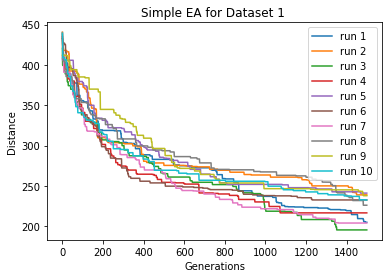

In [ ]:
t = np.arange(0,N_Generations)
for i in range(N_Experiments):
    plt.plot(t, bestdis1[i], label=f'run {i+1}')
plt.title('Simple EA for Dataset 1 ')
plt.xlabel('Generations')
plt.ylabel('Distance')
plt.legend()

In [ ]:
t = np.arange(0,N_Generations)
# add for cycle for plotting
for i in range(N_Experiments):
    plt.plot(t, bestdism[i], label=f'run {i+1}')
plt.title('EA with 2-opt for Dataset 1 ')
plt.xlabel('Generations')
plt.ylabel('Distance')
plt.legend()